In [109]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

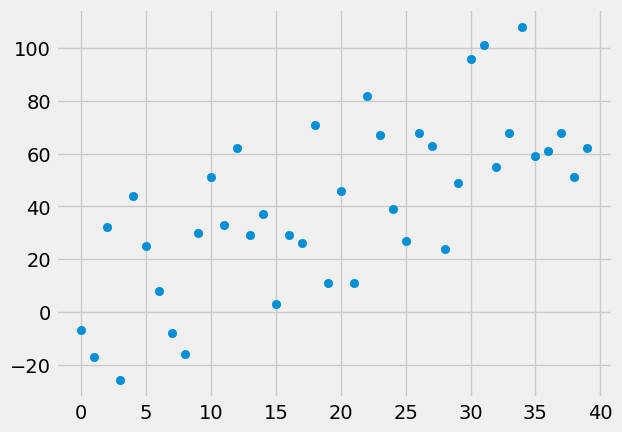

In [110]:
# xs=np.array([1,2,3,4,5,6],dtype=np.float64)
# ys=np.array([5,4,6,5,6,7],dtype=np.float64)
def create_dataset(hm,variance, step=2, correlation=False):
    val=1
    ys=[]
    for i in range(hm): #hm= how many
        y=val+random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
    xs=[i for i in range(len(ys))]

    return np.array(xs,dtype=np.float64), np.array(ys, dtype= np.float64)
plt.scatter(xs,ys)
plt.show()

In [111]:

def best_fit_slope_and_intercept(xs,ys):
    m=(mean(xs)*mean(ys)-mean(xs*ys))/(mean(xs)**2-mean(xs**2))
    b=mean(ys)-m*mean(xs)
    return m,b
m,b=best_fit_slope_and_intercept(xs,ys)
m,b

(1.9163227016885565, 3.1817073170731476)

In [112]:
regression_line =[(m*x)+b for x in xs]


In [113]:
predict_x=8
predict_y=(m*predict_x)+b

### R squared Theory - coefficient of determination

In [114]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line=[mean(ys_orig) for _ in ys_orig]
    squared_error_regr=squared_error(ys_orig,ys_line)
    squared_error_y_mean =squared_error(ys_orig,y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [115]:
r_squared= coefficient_of_determination(ys,regression_line)
r_squared

0.4795748525636341

In [116]:
xs,ys=create_dataset(40,40,2,correlation='pos')
xs,ys

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39.]),
 array([-14.,   7., -19., -30.,   2.,  18.,   0., -19., -13.,   6.,  13.,
         -5.,  55.,  44.,  67.,  60.,  47.,  73.,  13.,  49.,  33.,  44.,
         84.,  44.,  65.,  46.,  74.,  33.,  45.,  23.,  27.,  90.,  60.,
         77., 103.,  39.,  46.,  79.,  56.,  98.]))

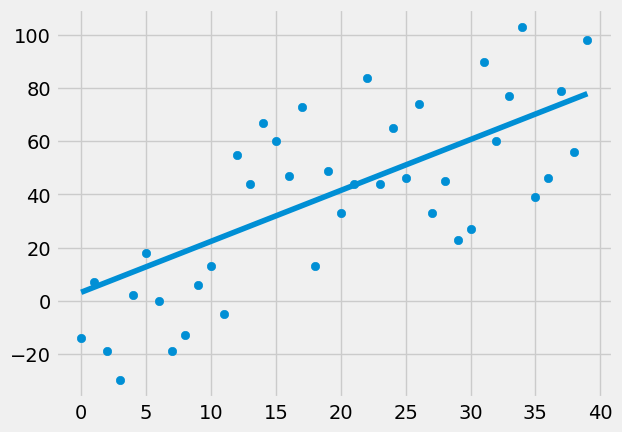

In [117]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()